# Iris Dataset Classification Pipeline

This notebook demonstrates a complete machine learning workflow following best practices:
1.  **Analyze Data**: Load and inspect the dataset.
2.  **Visualize Results**: Exploratory Data Analysis (EDA).
3.  **Train Model**: Data splitting, preprocessing, and model training using Pipelines.
4.  **Evaluate Performance**: Metrics and confusion matrix.
5.  **Deploy Model**: Model serialization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Best Practice: Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## 1. Analyze Data

In [2]:
# Load data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))

# Display first few rows
print("First 5 rows:")
display(df.head())

# Statistical summary
print("\nStatistical Summary:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


## 2. Visualize Results (EDA)

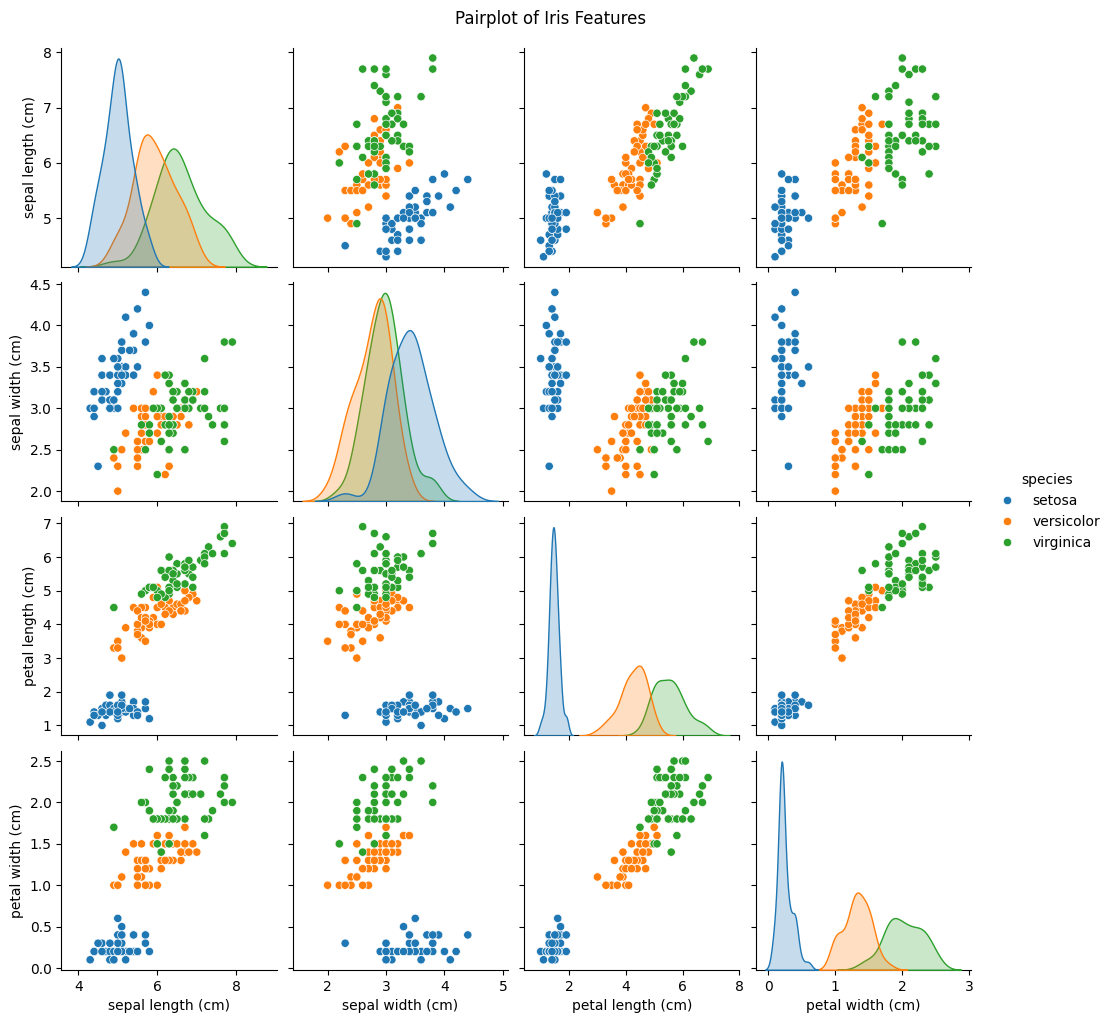

In [3]:
# Pairplot to see relationships between features
sns.pairplot(df.drop('target', axis=1), hue='species', height=2.5)
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

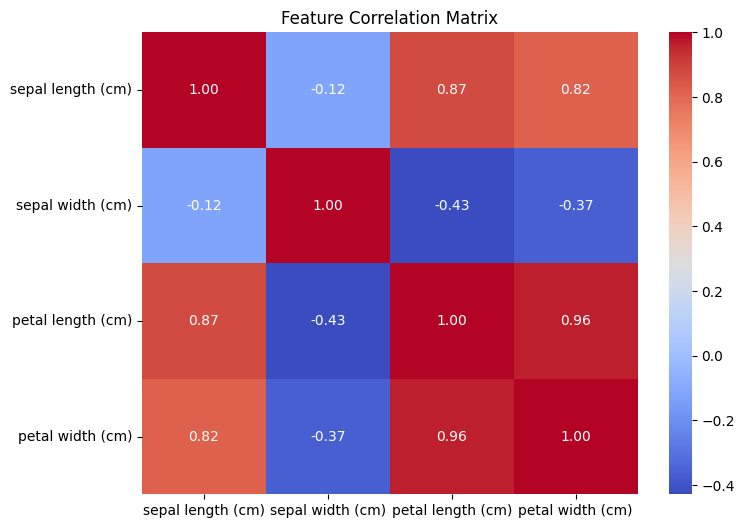

In [4]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df.drop(['species', 'target'], axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

## 3. Train Model
We use a **Pipeline** to encapsulate preprocessing (Scaling) and the Estimator (Random Forest). This prevents data leakage and simplifies deployment.

In [5]:
# Features and Target
X = df[iris.feature_names]
y = df['target']

# Split Data (Stratified split ensures class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

# Create Pipeline with Optimized Hyperparameters
# Best Parameters found: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=50,
        min_samples_split=10,
        min_samples_leaf=1,
        max_depth=None,
        random_state=RANDOM_SEED
    ))
])

# Train
pipeline.fit(X_train, y_train)
print("Model training complete with optimized parameters.")

Model training complete with optimized parameters.


## 4. Evaluate Performance

Test Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



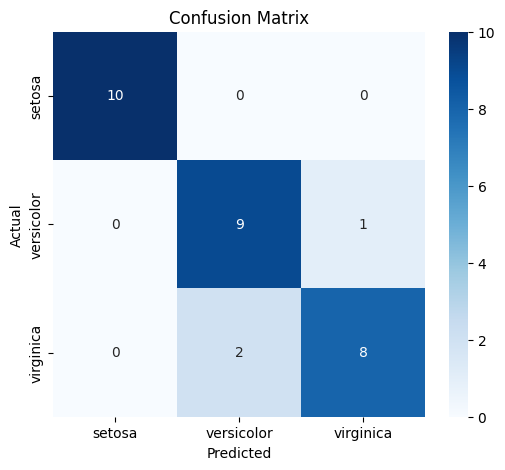

In [6]:
# Predictions
y_pred = pipeline.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 5. Deploy Model
Save the trained pipeline to a file.

In [7]:
model_filename = 'iris_model_pipeline.pkl'
joblib.dump(pipeline, model_filename)
print(f"Model saved to {model_filename}")

# Test Loading
loaded_model = joblib.load(model_filename)
sample_pred = loaded_model.predict(X_test.iloc[:2])
print(f"Prediction on loaded model (first 2 test samples): {iris.target_names[sample_pred]}")

Model saved to iris_model_pipeline.pkl
Prediction on loaded model (first 2 test samples): ['setosa' 'virginica']
